In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
import weibull
import scipy.optimize as optimization
sys.path.append('../../..')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [2]:
%matplotlib notebook

The next cell has parameters that might change from crystal to crystal

In [3]:
# Loading in the compressed data
Segmentname = 'Segments1'
Flattenedfilename = Segmentname+'_compr_flat_filt.npz'; print(Flattenedfilename)

# Histogram accumulation
accumlist = [] # all

# Parameters for binning
Z2minforhist = 0.0
Z2maxforhist = .15
Z2offset = 0.001
nbins_max = 8
levels = 3

Segments1_compr_flat_filt.npz


In [4]:
# # Loading in the compressed data
# Segmentname = 'Segments2'
# Flattenedfilename = Segmentname+'_compr_flat_filt.npz'; print(Flattenedfilename)

# # Histogram accumulation
# accumlist = [] # all

# # Parameters for binning
# Z2minforhist = 0.0
# Z2maxforhist = .25
# Z2offset = 0.001
# nbins_max = 8
# levels = 3

In [5]:
# Derivative names
Roughnessfilename = Flattenedfilename[0:-4]+'_roughness.jpg'; print(Roughnessfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

# This folder
cwd = os.getcwd(); i = cwd.index('crystals'); case_and_folder = cwd[i+9:]; print(case_and_folder)

Segments1_compr_flat_filt_roughness.jpg
12
2019-08-02/case1.1


In [6]:
# Histogram accumulation
if len(accumlist)==0:
    accumlist = [i for i in range(nsegments)]
plotthisone = accumlist
print('Accumulating segments', accumlist)
print('Plotting segments', plotthisone)

# Parameters for binning
print('Z2 ranging from', Z2minforhist, 'to', Z2maxforhist)
print('Max number of bins specified is', nbins_max)
Ntot = np.size(zgridtot[0]) # Just using the first one for a size estimate
nbins_sturges = int(1+3.3*np.log10(Ntot)); print('Sturges rule says maxbins =', nbins_sturges)
nbins = np.min([nbins_max,nbins_sturges]); print('Using nbins = ', nbins)
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,nbins); #print(Z2bins)
Z2theory = np.linspace(Z2minforhist,Z2maxforhist,50); Z2theory=Z2theory[1:] # This is for Weibull plots
print('Using levels =', levels, 'for uncertainty analysis')


Accumulating segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Plotting segments [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
Z2 ranging from 0.0 to 0.15
Max number of bins specified is 8
Sturges rule says maxbins = 11
Using nbins =  8
Using levels = 3 for uncertainty analysis


Original =  1484
4 0 371 [192  99  32  26   8   5   3]
4 1 371 [181  92  44  28  10   5   3]
4 2 371 [184  94  42  22  11  10   3]
4 3 371 [192  86  49  25   8   5   2]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03172471674698366
statsigma =  0.1781143361635544

****Working on segment 0


<IPython.core.display.Javascript object>


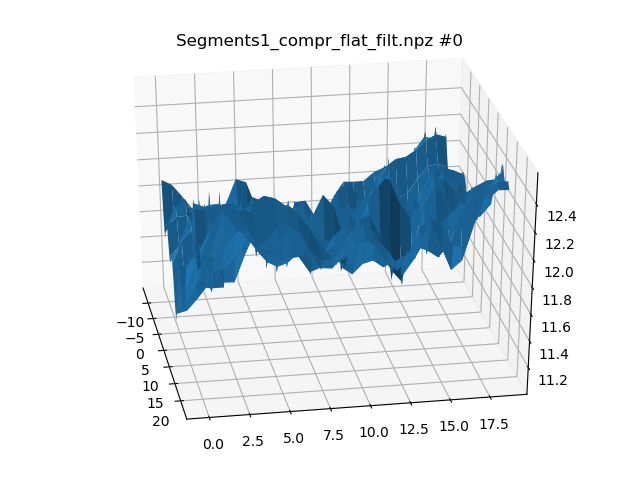

std dev of height =  0.2738767972871385
integral =  0.015855089469052508


<IPython.core.display.Javascript object>


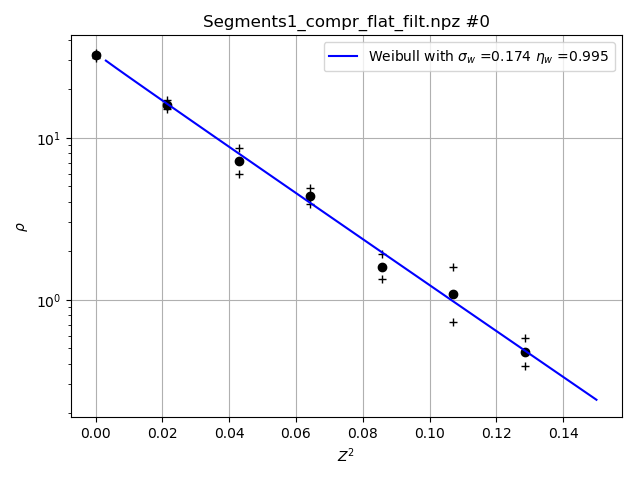

[31.20818827 14.97241595  5.9805156   3.89636347  1.33668928  0.72878094
  0.38968774]
Based on raw data: sigmaW, etaW =  0.17167085157783582 1.0222516303001388
Based on bins: sigmaW, etaW =  0.17421845720013565 0.9952932445374886
Original =  1484
4 0 371 [161  87  48  31  18   9   8]
4 1 371 [173  81  43  34  17   6   7]
4 2 371 [178  79  50  20  18  17   2]
4 3 371 [172  78  44  34  17  12   8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03813593818032766
statsigma =  0.1952842496985552

****Working on segment 1


<IPython.core.display.Javascript object>


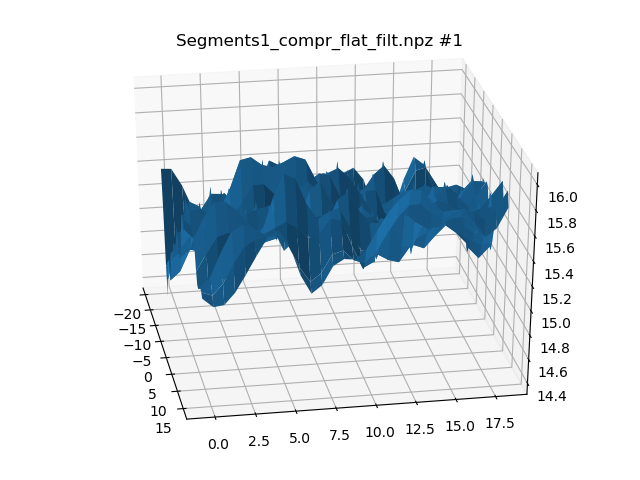

std dev of height =  0.2820738615818228
integral =  0.016196871310507677


<IPython.core.display.Javascript object>


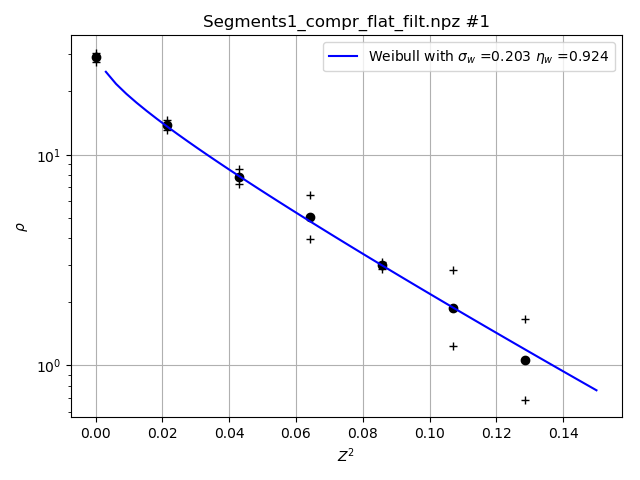

[27.68949393 13.04139804  7.24418772  3.98794959  2.86290867  1.23686056
  0.68471381]
Based on raw data: sigmaW, etaW =  0.18727362081124074 1.0102767448367345
Based on bins: sigmaW, etaW =  0.20368748899262468 0.9248442929195241
Original =  1484
4 0 371 [153 104  57  24  16  11   4]
4 1 371 [155 110  49  24  11   8   9]
4 2 371 [179  87  54  24  17   4   2]
4 3 371 [169 100  56  27  12   3   3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.033858192498279496
statsigma =  0.18400595777930534

****Working on segment 2


<IPython.core.display.Javascript object>


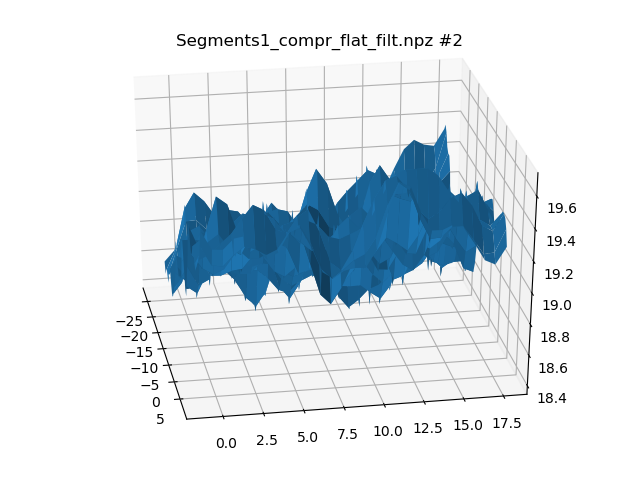

std dev of height =  0.28076840864902464
integral =  0.016522709627329196


<IPython.core.display.Javascript object>


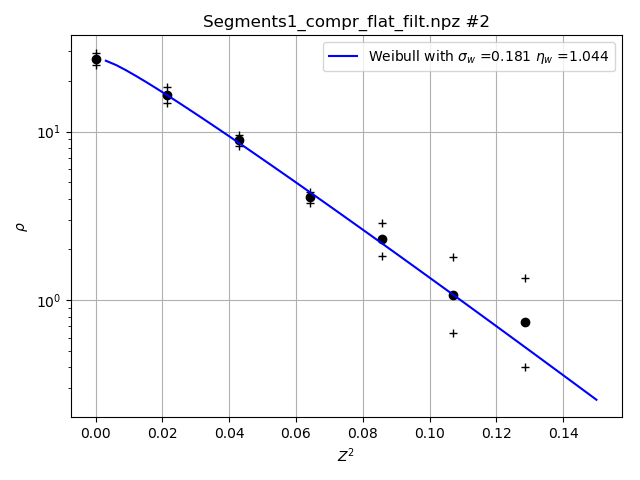

[24.74545989 14.76270351  8.22901605  3.79404023  1.8378711   0.63489581
  0.40427718]
Based on raw data: sigmaW, etaW =  0.1827870620048695 1.0681036377002637
Based on bins: sigmaW, etaW =  0.1811765836255195 1.044065542415586
Original =  1484
4 0 371 [158  98  45  34  15  10   1]
4 1 371 [163  90  43  30  17   7   7]
4 2 371 [153  91  60  24  19   6   7]
4 3 371 [181  67  55  24  19  11   7]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03965200069990553
statsigma =  0.19912810123110583

****Working on segment 3


<IPython.core.display.Javascript object>


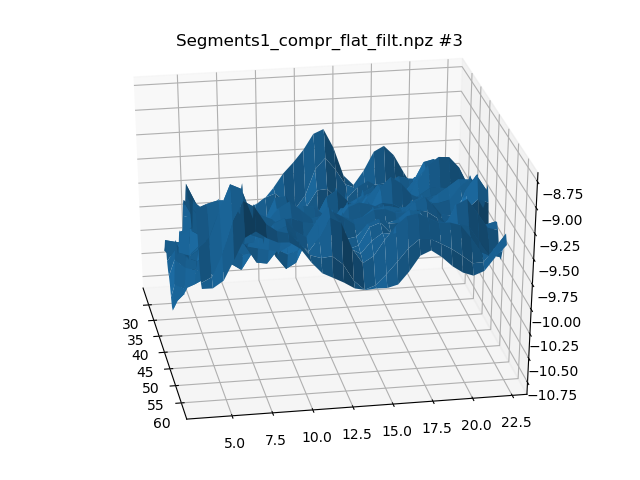

std dev of height =  0.3472094280849393
integral =  0.01639835545868833


<IPython.core.display.Javascript object>


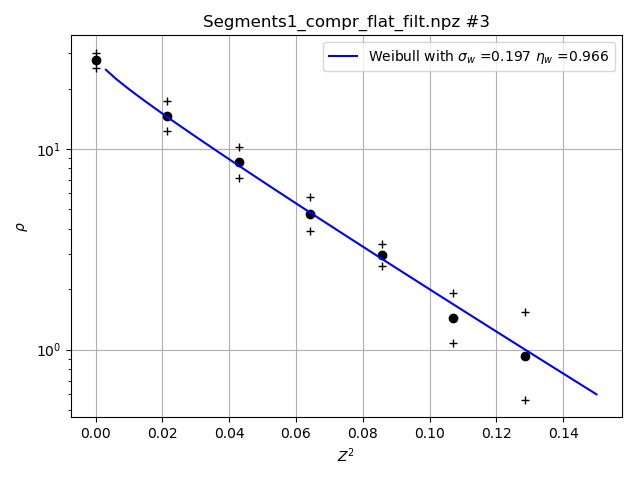

[25.42207211 12.32362527  7.20295518  3.91329326  2.61612889  1.07567617
  0.56189919]
Based on raw data: sigmaW, etaW =  0.1865272421799733 1.0268574594965414
Based on bins: sigmaW, etaW =  0.19735497226929208 0.9660820222778654
Original =  1484
4 0 371 [199  96  40  17   4   8   4]
4 1 371 [187  92  41  22  11   8   3]
4 2 371 [192  88  27  31  11   5   9]
4 3 371 [194  80  55  17  13   6   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03165043759142769
statsigma =  0.17790569859177555

****Working on segment 4


<IPython.core.display.Javascript object>


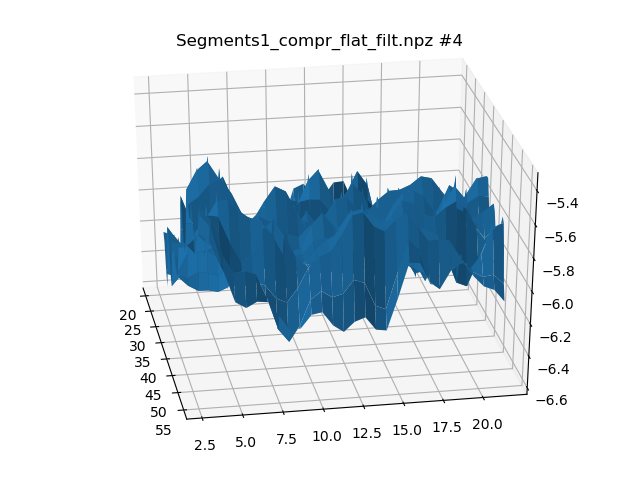

std dev of height =  0.25685839247601294
integral =  0.015632318501170958


<IPython.core.display.Javascript object>


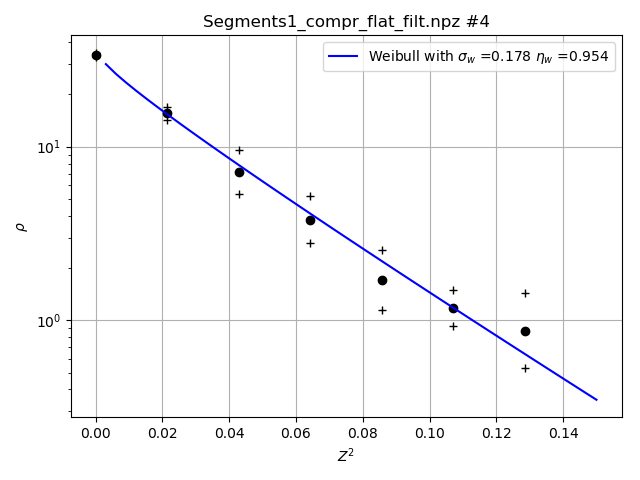

[32.72053668 14.24137501  5.3248538   2.78515551  1.14619665  0.93103631
  0.52927719]
Based on raw data: sigmaW, etaW =  0.1713249655530264 0.9889920202631232
Based on bins: sigmaW, etaW =  0.17867080206384178 0.9547187709917705
Original =  1484
4 0 371 [177  97  47  25  10   7   3]
4 1 371 [191  90  39  28  10   5   5]
4 2 371 [192  89  46  21   6   6   4]
4 3 371 [189  87  42  25   7  10   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03251884794806656
statsigma =  0.1803298309988299

****Working on segment 5


<IPython.core.display.Javascript object>


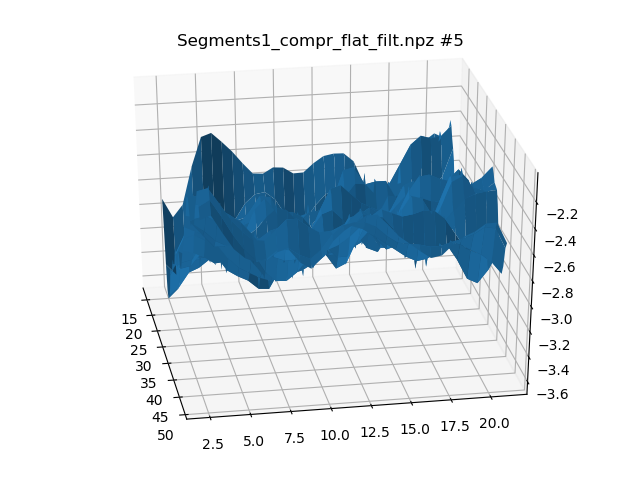

std dev of height =  0.264147213204112
integral =  0.015822259136212626


<IPython.core.display.Javascript object>


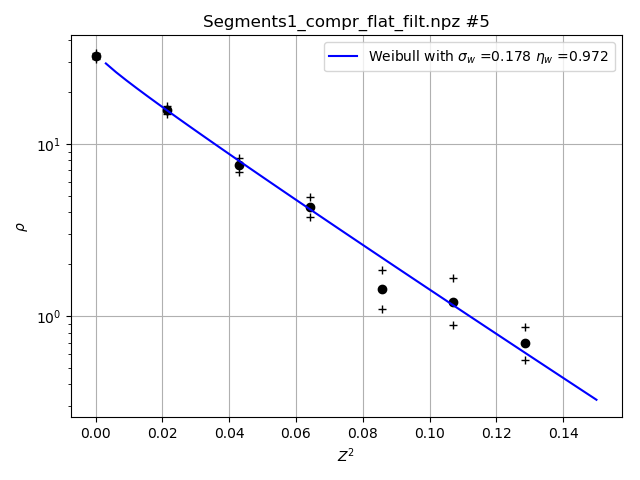

[30.99678934 14.83752735  6.82470715  3.75575074  1.0970189   0.88287452
  0.55538401]
Based on raw data: sigmaW, etaW =  0.17223830780717894 1.0179881375178998
Based on bins: sigmaW, etaW =  0.17882851222176194 0.972309142936502
Original =  1484
4 0 371 [180  98  37  30  11   9   2]
4 1 371 [181  93  45  26  15   3   4]
4 2 371 [166 102  53  29  10   4   6]
4 3 371 [167 101  58  26   9   3   3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.032169197238718035
statsigma =  0.17935773537463623

****Working on segment 6


<IPython.core.display.Javascript object>


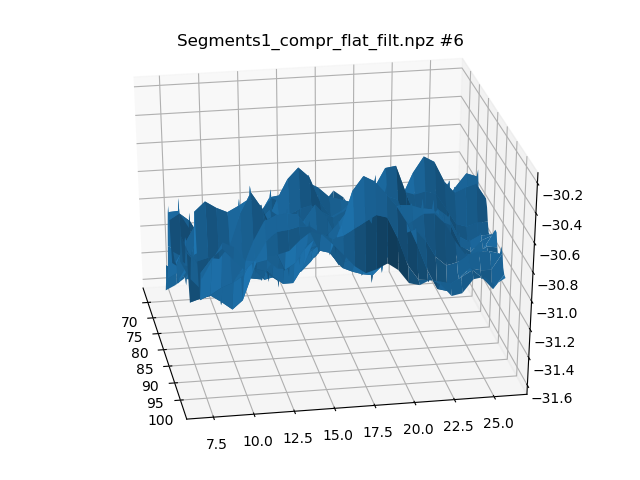

std dev of height =  0.2979264477228298
integral =  0.016264445955132562


<IPython.core.display.Javascript object>


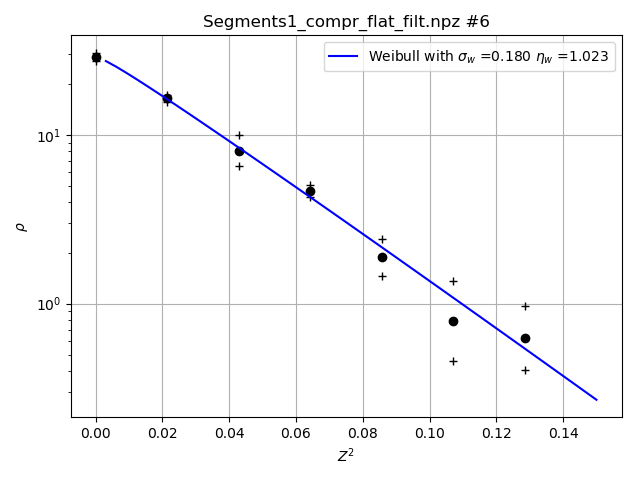

[27.46510293 15.69398148  6.56052107  4.25909974  1.46822982  0.45984777
  0.40513744]
Based on raw data: sigmaW, etaW =  0.17697881128921278 1.0446407552371115
Based on bins: sigmaW, etaW =  0.1800015195217577 1.0233484561953183
Original =  1484
4 0 371 [171  88  47  24  14   7   4]
4 1 371 [177  83  52  19  12   7   7]
4 2 371 [181  82  45  22  11   8   9]
4 3 371 [164  98  45  22  15   6   6]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03906926668581592
statsigma =  0.1976594715307514

****Working on segment 7


<IPython.core.display.Javascript object>


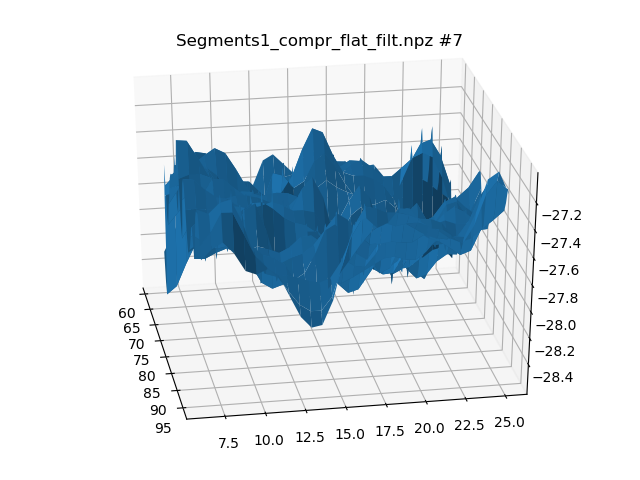

std dev of height =  0.2569244282242548
integral =  0.01602634742536566


<IPython.core.display.Javascript object>


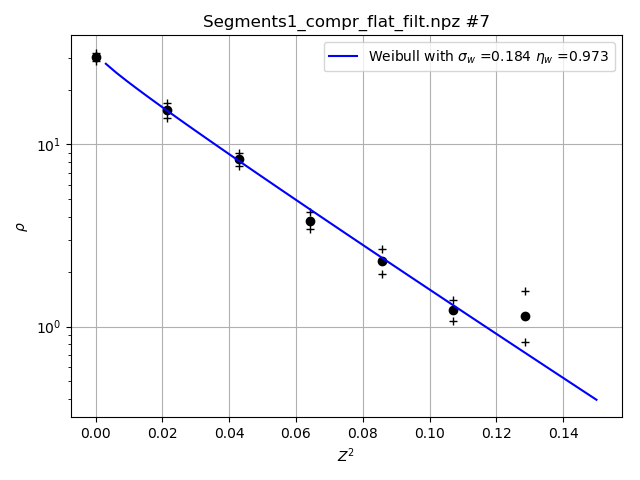

[28.84039054 13.95872936  7.62870863  3.41742027  1.94667161  1.07451098
  0.82141395]
Based on raw data: sigmaW, etaW =  0.17743544605393724 0.9756985500056429
Based on bins: sigmaW, etaW =  0.18441617786838227 0.973668462415002
Original =  1484
4 0 371 [182  95  46  17  11   1   5]
4 1 371 [182  84  46  30   8   9   0]
4 2 371 [187  92  39  26   5   4   6]
4 3 371 [185  95  53  12   6   6   6]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03679107291040958
statsigma =  0.19180999168554694

****Working on segment 8


<IPython.core.display.Javascript object>


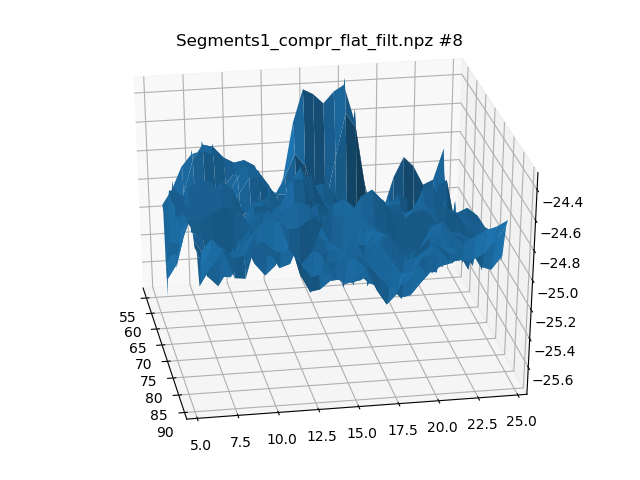

std dev of height =  0.271057527726393
integral =  0.01581810053645937


<IPython.core.display.Javascript object>


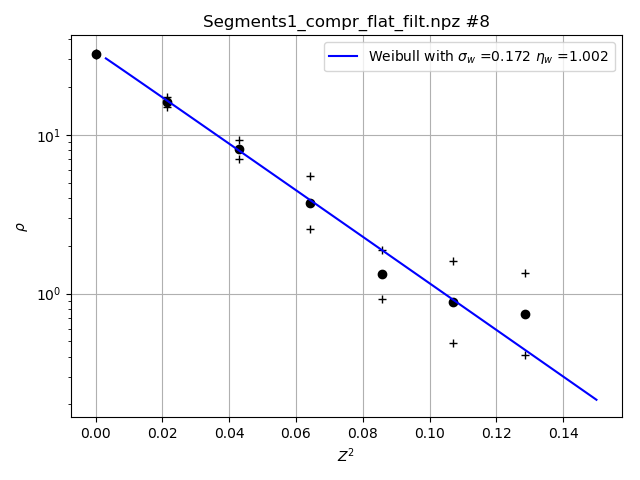

[31.84702582 15.06209971  7.03788277  2.55056907  0.92611476  0.48592179
  0.41234024]
Based on raw data: sigmaW, etaW =  0.17048754920197887 1.020816433051094
Based on bins: sigmaW, etaW =  0.17244586925776817 1.0022280547644637
Original =  1484
4 0 371 [183  87  37  37  14   1   6]
4 1 371 [177  94  52  20  18   3   3]
4 2 371 [184 109  37  24   9   6   0]
4 3 371 [189  99  48  13  10   3   4]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.031294838913478736
statsigma =  0.17690347343531368

****Working on segment 9


<IPython.core.display.Javascript object>


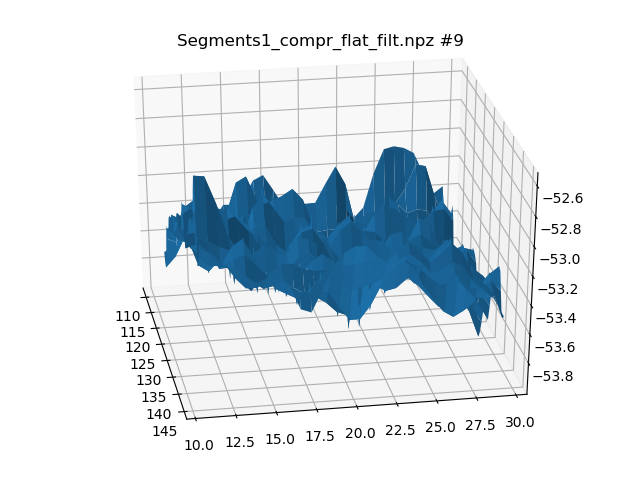

std dev of height =  0.20954143055850608
integral =  0.01598013438504236


<IPython.core.display.Javascript object>


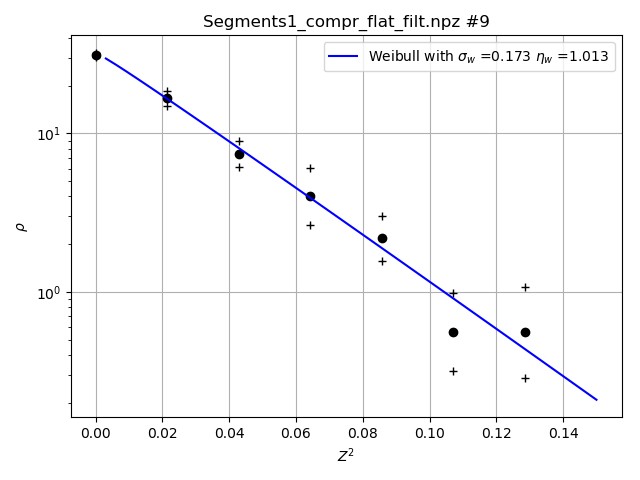

[30.28896305 14.89057384  6.12255536  2.6452411   1.56756158  0.31461346
  0.28810308]
Based on raw data: sigmaW, etaW =  0.17391261053629004 1.0673875482476072
Based on bins: sigmaW, etaW =  0.1732224430286526 1.0134518234682024
Original =  1484
4 0 371 [186 100  34  24  11   4   2]
4 1 371 [215  66  40  23  12   9   1]
4 2 371 [187  91  54  17  10   4   2]
4 3 371 [181  88  56  16  13   5   3]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03144278632492968
statsigma =  0.17732113896805896

****Working on segment 10


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


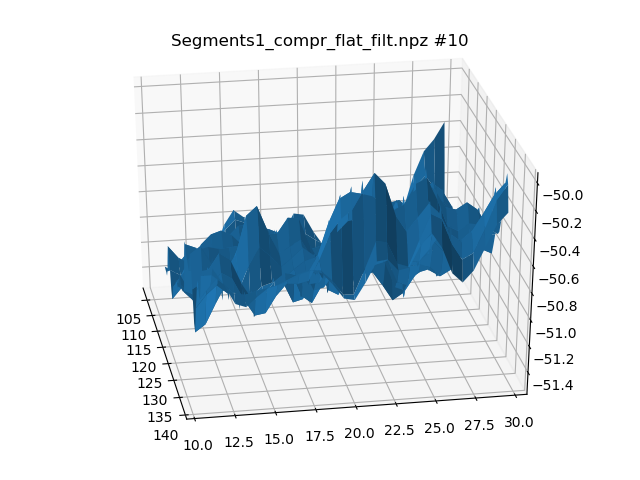

std dev of height =  0.2944191968800242
integral =  0.0157029868343486


<IPython.core.display.Javascript object>


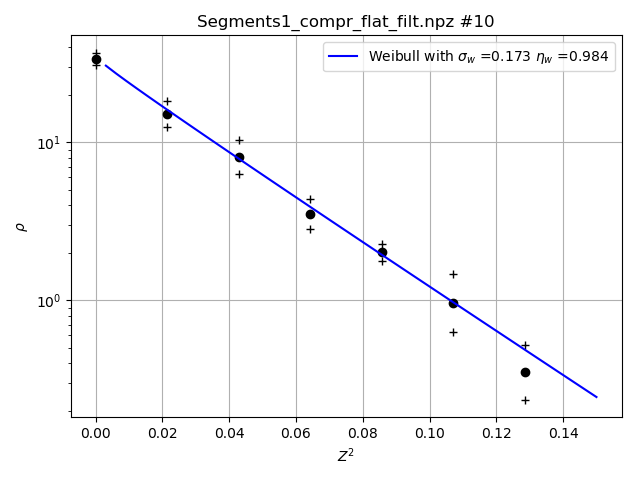

[30.72332854 12.57982671  6.29660676  2.81340705  1.77512636  0.63377344
  0.23502864]
Based on raw data: sigmaW, etaW =  0.1693689277721047 1.0294146817516838
Based on bins: sigmaW, etaW =  0.17325578891288307 0.9844006647362643
Original =  1484
4 0 371 [195  81  48  17  13   4   5]
4 1 371 [191  78  47  29   9   4   6]
4 2 371 [189  74  43  27   7   9   8]
4 3 371 [184  90  39  23   4   9   8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03650519865267891
statsigma =  0.19106333675689563

****Working on segment 11


<IPython.core.display.Javascript object>


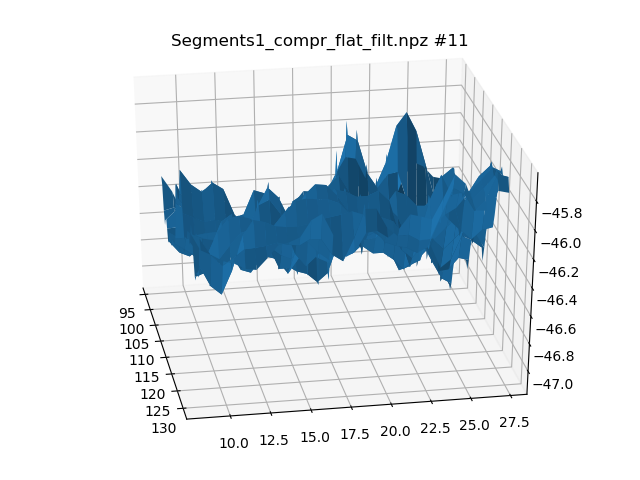

std dev of height =  0.2931669031912671
integral =  0.015584415584415583


<IPython.core.display.Javascript object>


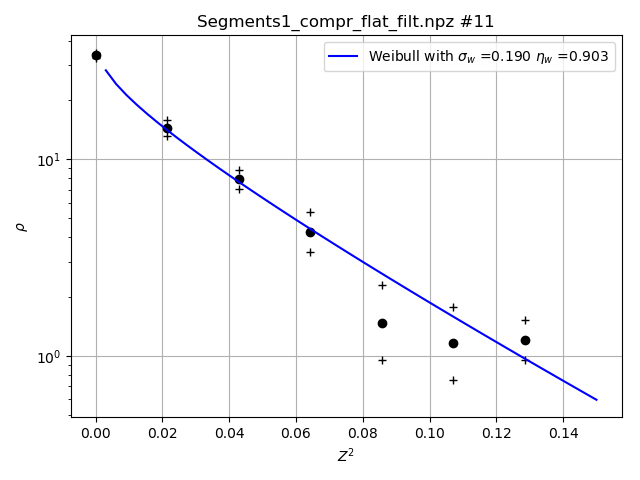

[32.8459317  13.06054683  7.08945748  3.37911381  0.94797998  0.75476684
  0.94880418]
Based on raw data: sigmaW, etaW =  0.17257672686008788 0.9712679388376391
Based on bins: sigmaW, etaW =  0.19095691502168427 0.9032237174494218


In [7]:
# Arrays for accumulating 
counts_list = []
meanZ2_list = []
Z2flat_list = []

# First-guess for Weibull fitting (sigma2W, etaW)
x0 = np.array([.1,.9])

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    Ntot = np.size(sollast)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Get the probability distribution in Z2
    counts, bins, meanZ2, Z2flat, error = rs.getrhoofz2(sollast,dx,dy,Z2bins=Z2bins,levels=levels)
    print('meanZ2 = ', meanZ2)
    print('statsigma = ', np.sqrt(meanZ2))

    # Plot if we want
    if isegment in plotthisone:
        
        # Reporting
        print('')
        print('****Working on segment', isegment)
        
        # Graph the surface
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_title(title)
        ax.view_init(30, -10)
        
        # Normalize the distribution function, report stats
        integral_rho = np.trapz(counts, bins)
        print ('std dev of height = ', np.std(sollast))
        print('integral = ', integral_rho)
        counts = counts/integral_rho
        error = error/integral_rho

        # Graph the probability
        plt.figure()
        plt.semilogy(bins, counts, 'ok')
        countsplus = counts+error; #print(countsplus)
        countsminus = counts**2/countsplus; print(countsminus)
        plt.semilogy(bins, countsplus, '+k')
        plt.semilogy(bins, countsminus,'+k')
        plt.title(title)
        plt.xlabel(r'$Z^{2}$')
        plt.ylabel(r'$\rho$')
        plt.grid(True)
        
        # Eliminate entries greater than a threshold (not sure if this is necessary)
        ikeep = np.argwhere(Z2flat < Z2maxforhist)
        Z2flat_new = np.squeeze(Z2flat[ikeep])

        # Attempt a best-fit based on the raw data
        analysis = weibull.Analysis(Z2flat_new)
        analysis.fit(method='mle')
        etaW = analysis.beta
        sigma2W = analysis.eta
        sigmaW = np.sqrt(sigma2W)
        print('Based on raw data: sigmaW, etaW = ', sigmaW, etaW)
        
        # Attempt a best-fit based on the bins
        errors = np.log(countsplus/counts); #print(errors)
        solution, solutionerror = optimization.curve_fit(sts.logWeibull, bins+Z2offset, np.log(counts),x0,sigma=errors)
        etaW = solution[1]
        sigma2W = solution[0]
        sigmaW = np.sqrt(sigma2W)
        print('Based on bins: sigmaW, etaW = ', sigmaW, etaW)
        
        # Graph the best-fit probability
        myWeibull = sts.Weibull(Z2theory,sigma2W,etaW)
        plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ' $\eta_w$ =' + str(etaW)[0:5])
        plt.legend()
        
    # Accumulate if we want
    if isegment in accumlist:
        counts_list.append(counts)
        meanZ2_list.append(meanZ2)
        Z2flat_list.append(Z2flat)

Original =  1484
4 0 371 [195  81  48  17  13   4   5]
4 1 371 [191  78  47  29   9   4   6]
4 2 371 [189  74  43  27   7   9   8]
4 3 371 [184  90  39  23   4   9   8]
ilevelp = 4
ilevelp, t = 4 2.7764451051977987
meanZ2 =  0.03650519865267891
statsigma =  0.19106333675689563
integral =  0.015584415584415583
Based on raw data: sigmaW, etaW =  0.18278002916734515 0.9319010787887163
Based on bins: sigmaW, etaW =  0.19095691502168427 0.9032237174494218


/Users/nesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


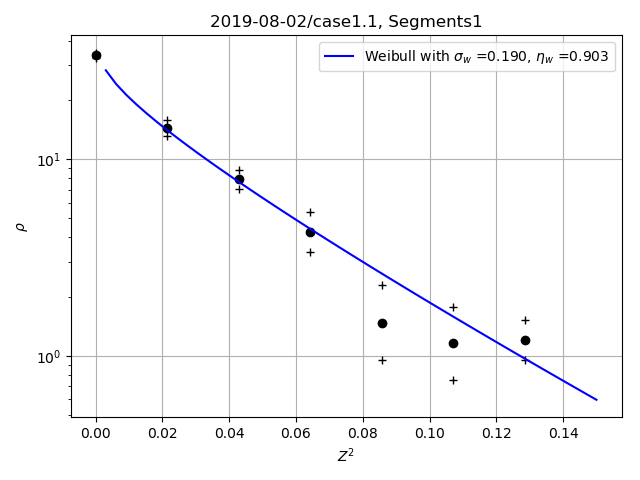

In [8]:
# Sum up the accumulated information
# Naccum, Laccum = np.shape(Z2flat_list)
# Z2flat_total = np.reshape(Z2flat_list,Naccum*Laccum,1)
Z2flat_total = []
for i in Z2flat_list:
    for j in i:
        Z2flat_total.append(j)
Z2flat_total = np.array(Z2flat_total)
#ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
#Z2flat_new = np.squeeze(Z2flat_total[ikeep])
Z2flat_new = np.squeeze(Z2flat_total)
# ikeep = np.argwhere(Z2flat_total < Z2maxforhist)
# Z2flat_new = np.squeeze(Z2flat_total[ikeep])

# Get the probability distribution in Z2
counts, bins, meanZ2, error = rs.getrhoofz2flat(Z2flat,nbins,Z2bins,levels)
print('meanZ2 = ', meanZ2)
print('statsigma = ', np.sqrt(meanZ2))

# Normalize the distribution function
integral_rho = np.trapz(counts, bins)
print('integral = ', integral_rho)
counts = counts/integral_rho
error = error/integral_rho
countsplus = counts+error; #print(countsplus)
countsminus = counts**2/countsplus; #print(countsminus)

# Attempt a best-fit based on the raw data
analysis = weibull.Analysis(Z2flat_new)
analysis.fit(method='mle')
etaW = analysis.beta
sigma2W = analysis.eta
sigmaW = np.sqrt(sigma2W)
print('Based on raw data: sigmaW, etaW = ', sigmaW, etaW)

# Attempt a best-fit based on the bins
errors = np.log(countsplus/counts); #print(errors)
solution, solutionerror = optimization.curve_fit(sts.logWeibull, bins+Z2offset, np.log(counts),x0,sigma=errors)
etaW = solution[1]
sigma2W = solution[0]
sigmaW = np.sqrt(sigma2W)
print('Based on bins: sigmaW, etaW = ', sigmaW, etaW)

# Graph the probability
plt.figure()
plt.semilogy(bins, counts, 'ok')
plt.semilogy(bins, countsplus, '+k')
plt.semilogy(bins, countsminus,'+k')
plt.title(case_and_folder + ', ' + Segmentname)
plt.xlabel(r'$Z^{2}$')
plt.ylabel(r'$\rho$')
plt.grid(True)

# Graph the best-fit probability
myWeibull = sts.Weibull(Z2theory,sigma2W,etaW)
plt.semilogy(Z2theory, myWeibull, 'b',label = 'Weibull with $\sigma_w$ =' + str(sigmaW)[0:5] + ', $\eta_w$ =' + str(etaW)[0:5])
plt.legend()

In [9]:
plt.savefig(Roughnessfilename)